## Title : Predictive Analysis and Customer Segmentation for an E-Commerce Platform

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the Dataset

In [2]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\IneuBytes\Major project\data.csv", encoding='ISO-8859-1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Exploratory Data Analysis

In [4]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display the missing values count for each column
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# Handling missing values in "Description"
data['Description'].fillna('No Description', inplace=True)

# Handling missing values in "CustomerID"
# If you decide to remove rows with missing CustomerID:
data.dropna(subset=['CustomerID'], inplace=True)

In [7]:
# Display the missing values count for each column
missing_values = data.isnull().sum()
print(missing_values)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


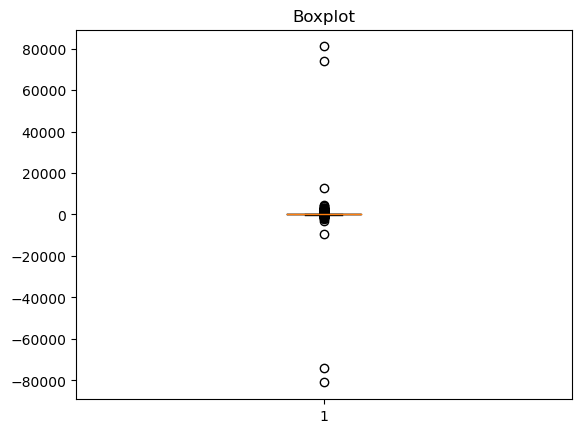

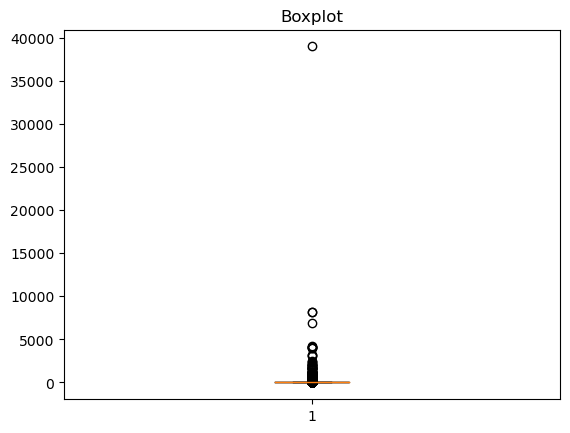

In [8]:
## Checking for outliers
# Boxplot for numerical columns to visualize outliers
plt.boxplot(data['Quantity']);plt.title('Boxplot');plt.show()

plt.boxplot(data['UnitPrice']);plt.title('Boxplot');plt.show()


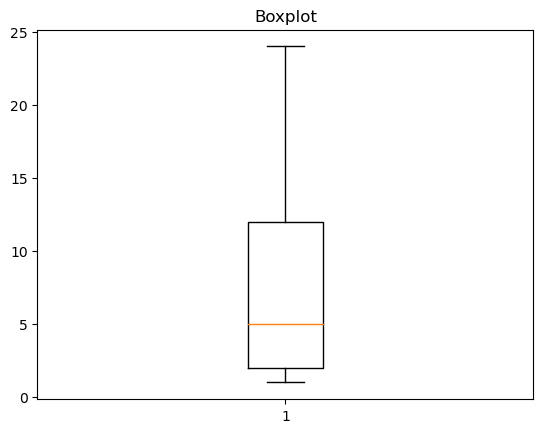

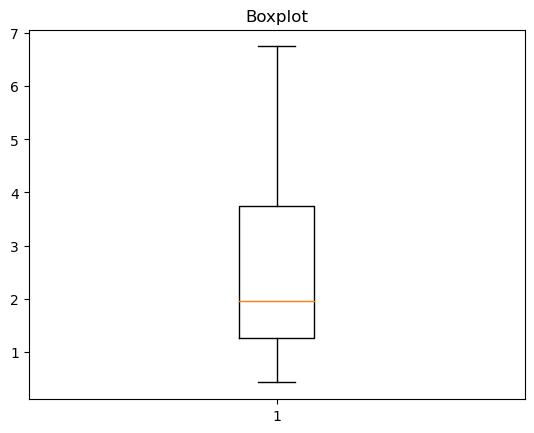

In [9]:
from scipy.stats.mstats import winsorize

data['Quantity']=winsorize(data['Quantity'],limits=[0.09, 0.091])   
plt.boxplot(data['Quantity']);plt.title('Boxplot');plt.show()

data['UnitPrice']=winsorize(data['UnitPrice'],limits=[0.05, 0.095])   
plt.boxplot(data['UnitPrice']);plt.title('Boxplot');plt.show()


In [10]:
##Check for Duplicates
data.duplicated().sum()

5333

In [11]:
#Remove the duplicate rows 
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401496 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401496 non-null  object 
 1   StockCode    401496 non-null  object 
 2   Description  401496 non-null  object 
 3   Quantity     401496 non-null  int64  
 4   InvoiceDate  401496 non-null  object 
 5   UnitPrice    401496 non-null  float64
 6   CustomerID   401496 non-null  float64
 7   Country      401496 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [14]:
# Calculate the number of unique invoices
unique_invoices = data['InvoiceDate'].nunique()
print("Number of Unique Invoices:", unique_invoices)

Number of Unique Invoices: 20460


In [15]:
# Calculate the total revenue
data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']
total_revenue = data['TotalRevenue'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 5828575.199999997


In [16]:
# Identify the most popular products
popular_products = data['Description'].value_counts().head(10)
print("Most Popular Products:")
print(popular_products)

Most Popular Products:
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1658
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1344
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1195
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
Name: Description, dtype: int64


In [17]:
# Identify the top countries by transaction count
top_countries = data['Country'].value_counts().head(10)
print("Top Countries by Transaction Count:")
print(top_countries)

Top Countries by Transaction Count:
United Kingdom    356636
Germany             9476
France              8474
EIRE                7475
Spain               2528
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1471
Australia           1258
Name: Country, dtype: int64


In [18]:
# Handle negative Quantity and UnitPrice values
data = data[data['Quantity'] > 0]
data = data[data['UnitPrice'] > 0]

In [19]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [20]:
# time series data handling
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Date'] = data['InvoiceDate'].dt.date
data['Day'] = data['InvoiceDate'].dt.day_name()
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['Month'] = data['InvoiceDate'].dt.to_period('M')
data['Quarter'] = data['InvoiceDate'].dt.quarter
data['Year'] = data['InvoiceDate'].dt.year
data['Time'] = data['InvoiceDate'].dt.time
data['Hour'] = data['InvoiceDate'].dt.hour

In [21]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Date,Day,DayOfWeek,Month,Quarter,Year,Time,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,Wednesday,2,2010-12,4,2010,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,Wednesday,2,2010-12,4,2010,08:26:00,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,Wednesday,2,2010-12,4,2010,08:26:00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,Wednesday,2,2010-12,4,2010,08:26:00,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,Wednesday,2,2010-12,4,2010,08:26:00,8


In [22]:
#Create features that summarize customer behavior, such as total spending per customer, average spending per transaction, or number of transactions.
customer_spending = data.groupby('CustomerID')['TotalRevenue'].sum()
customer_transactions = data.groupby('CustomerID')['InvoiceNo'].nunique()

data = data.merge(customer_spending, on='CustomerID', suffixes=('', '_TotalSpending'))
data = data.merge(customer_transactions, on='CustomerID', suffixes=('', '_NumTransactions'))

## Data visualization

Text(0, 0.5, 'Total Revenue')

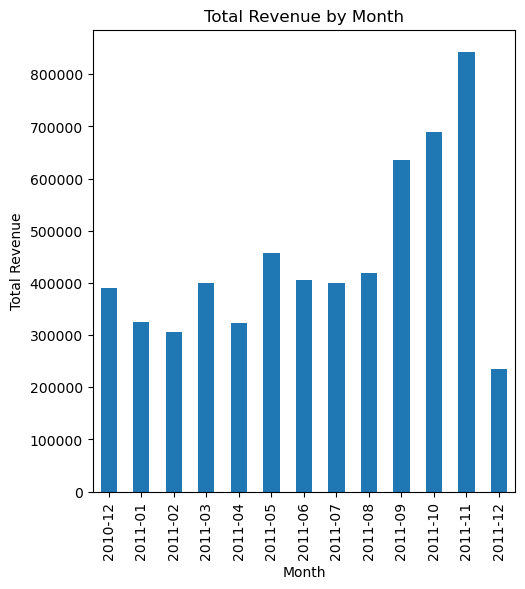

In [24]:
plt.figure(figsize=(12, 6))

# Plot the total revenue by month
plt.subplot(1, 2, 1)
data.groupby('Month')['TotalRevenue'].sum().plot(kind='bar')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')

<Axes: xlabel='Month'>

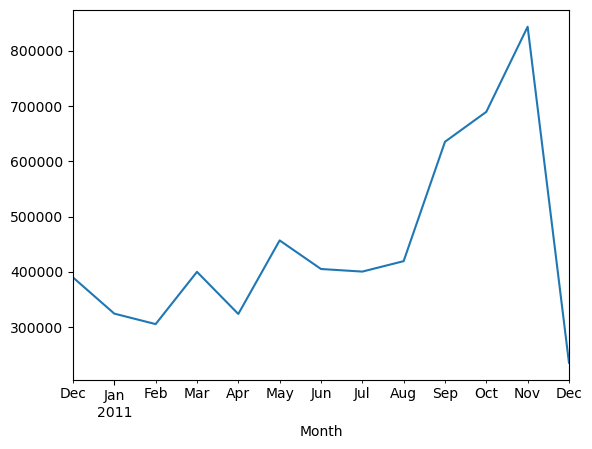

In [25]:
data.groupby('Month')['TotalRevenue'].sum().plot()

In [26]:
top10_gmvcountry = data.groupby("Country")['TotalRevenue'].sum().sort_values(ascending=False).head(10).reset_index()
top10_gmvcountry

,Country,TotalRevenue
0,United Kingdom,4884922.08
1,Germany,182219.57
2,EIRE,160690.75
3,France,156925.80
4,Netherlands,83501.96
5,Australia,44299.21
6,Switzerland,42802.44
7,Spain,40859.90
8,Belgium,34903.23
9,Norway,26215.16


In [27]:
# Identify the top countries by transaction count
top_countries = data['Country'].value_counts().head(10)
print("Top Countries by Transaction Count:")
print(top_countries)

Top Countries by Transaction Count:
United Kingdom    356636
Germany             9476
France              8474
EIRE                7475
Spain               2528
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1471
Australia           1258
Name: Country, dtype: int64


In [28]:
top5_producstgmv = data.groupby("Description").agg({"TotalRevenue": "sum"}) \
                    .sort_values(by="TotalRevenue", ascending=False).head(5) \
                    .reset_index() \
                    .rename(columns={"TotalRevenue": "TransactionValue", "Description":"Products"})
top5_producstgmv     

,Products,TransactionValue
0,REGENCY CAKESTAND 3 TIER,65638.45
1,WHITE HANGING HEART T-LIGHT HOLDER,53342.80
2,PARTY BUNTING,46912.62
3,JUMBO BAG RED RETROSPOT,37629.46
4,ASSORTED COLOUR BIRD ORNAMENT,32735.22


In [29]:
data_by_day = data.groupby(["Day", "DayOfWeek"]).agg({"TotalRevenue": "sum", "InvoiceNo":"count"}) \
            .reset_index() \
            .sort_values(by="DayOfWeek") \
            .rename(columns = {"TotalRevenue":"ValueTransaction", "InvoiceNo":"NumberOfOrders"})
data_by_day

,Day,DayOfWeek,ValueTransaction,NumberOfOrders
1,Monday,0,938488.29,65695
4,Tuesday,1,1024096.49,67359
5,Wednesday,2,1069656.73,69736
3,Thursday,3,1277317.79,81551
0,Friday,4,877839.61,55492
2,Sunday,6,641176.29,61663


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


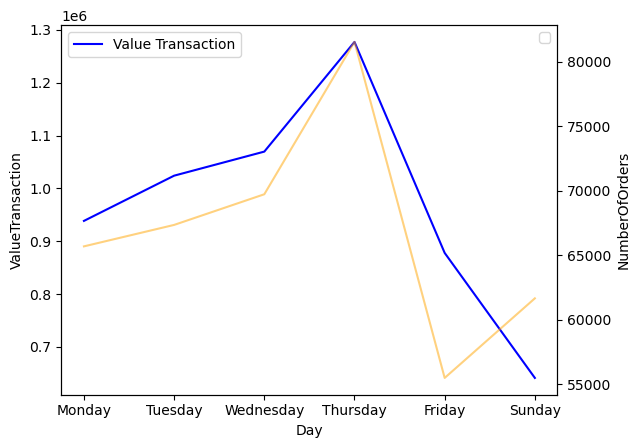

In [30]:
# plot line graph on axis #1
sns.lineplot(data=data_by_day, x="Day", y="ValueTransaction" ,color='blue')
plt.legend(['Value Transaction'], loc="upper left")
plt.twinx()
# plot bar graph on axis #2
sns.lineplot(data=data_by_day, x="Day", y="NumberOfOrders", color='orange', alpha=0.5)
plt.legend(['NumberOfOrders'], loc="upper right")
plt.legend()
plt.show();

## Predictive Model Building

In [31]:
# label encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Description'] = lb.fit_transform(data['Description'])
data['Country'] = lb.fit_transform(data['Country'])

In [32]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Date,Day,DayOfWeek,Month,Quarter,Year,Time,Hour,TotalRevenue_TotalSpending,InvoiceNo_NumTransactions
0,536365,85123A,3716,6,2010-12-01 08:26:00,2.55,17850.0,35,15.30,2010-12-01,Wednesday,2,2010-12,4,2010,08:26:00,8,4876.34,35
1,536365,71053,3724,6,2010-12-01 08:26:00,3.39,17850.0,35,20.34,2010-12-01,Wednesday,2,2010-12,4,2010,08:26:00,8,4876.34,35
2,536365,84406B,861,8,2010-12-01 08:26:00,2.75,17850.0,35,22.00,2010-12-01,Wednesday,2,2010-12,4,2010,08:26:00,8,4876.34,35
3,536365,84029G,1813,6,2010-12-01 08:26:00,3.39,17850.0,35,20.34,2010-12-01,Wednesday,2,2010-12,4,2010,08:26:00,8,4876.34,35
4,536365,84029E,2776,6,2010-12-01 08:26:00,3.39,17850.0,35,20.34,2010-12-01,Wednesday,2,2010-12,4,2010,08:26:00,8,4876.34,35


In [33]:
# Remove non-numeric columns
X = data.drop(columns=['TotalRevenue_TotalSpending','InvoiceDate','StockCode','Date','Day','DayOfWeek','Month','Quarter','Year','Time','Hour', 'InvoiceNo'])
y = data['TotalRevenue_TotalSpending']

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalRevenue', 'Date', 'Day',
       'DayOfWeek', 'Month', 'Quarter', 'Year', 'Time', 'Hour',
       'TotalRevenue_TotalSpending', 'InvoiceNo_NumTransactions'],
      dtype='object')

## Linear Regression

In [37]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


# Make predictions on both the training and test sets
linear_train_pred = linear_reg.predict(X_train)
linear_test_pred = linear_reg.predict(X_test)


# Evaluate the models
print("Linear Regression:")
print("Training MAE:", mean_absolute_error(y_train, linear_train_pred))
print("Test MAE:", mean_absolute_error(y_test, linear_test_pred))
print("Training MSE:", mean_squared_error(y_train, linear_train_pred))
print("Test MSE:", mean_squared_error(y_test, linear_test_pred))
print("Training R-squared:", r2_score(y_train, linear_train_pred))
print("Test R-squared:", r2_score(y_test, linear_test_pred))


Linear Regression:
Training MAE: 4449.56025970761
Test MAE: 4396.695988230413
Training MSE: 82018559.05930251
Test MSE: 79862576.78732835
Training R-squared: 0.7094605338793227
Test R-squared: 0.7110432285019921


## Decision Tree Regression

In [38]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)


# Make predictions on both the training and test sets
dt_train_pred = dt_reg.predict(X_train)
dt_test_pred = dt_reg.predict(X_test)


# Evaluate the models
print("\nDecision Tree Regression:")
print("Training MAE:", mean_absolute_error(y_train, dt_train_pred))
print("Test MAE:", mean_absolute_error(y_test, dt_test_pred))
print("Training MSE:", mean_squared_error(y_train, dt_train_pred))
print("Test MSE:", mean_squared_error(y_test, dt_test_pred))
print("Training R-squared:", r2_score(y_train, dt_train_pred))
print("Test R-squared:", r2_score(y_test, dt_test_pred))



Decision Tree Regression:
Training MAE: 2.2914169252353193e-10
Test MAE: 5.663742216913324
Training MSE: 9.431164267247072e-19
Test MSE: 6337.327726749689
Training R-squared: 1.0
Test R-squared: 0.9999770704398291


## Random Forest Regression

In [39]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)


# Make predictions on both the training and test sets
rf_train_pred = rf_reg.predict(X_train)
rf_test_pred = rf_reg.predict(X_test)



# Evaluate the models
print("\nRandom Forest Regression:")
print("Training MAE:", mean_absolute_error(y_train, rf_train_pred))
print("Test MAE:", mean_absolute_error(y_test, rf_test_pred))
print("Training MSE:", mean_squared_error(y_train, rf_train_pred))
print("Test MSE:", mean_squared_error(y_test, rf_test_pred))
print("Training R-squared:", r2_score(y_train, rf_train_pred))
print("Test R-squared:", r2_score(y_test, rf_test_pred))



Random Forest Regression:
Training MAE: 3.557037239054878
Test MAE: 9.47856674481643
Training MSE: 668.6755998375637
Test MSE: 3867.859057304392
Training R-squared: 0.999997631308645
Test R-squared: 0.9999860054094074


## Customer Segmentation (Clustering)
## Apply clustering techniques K-Means  to segment customers

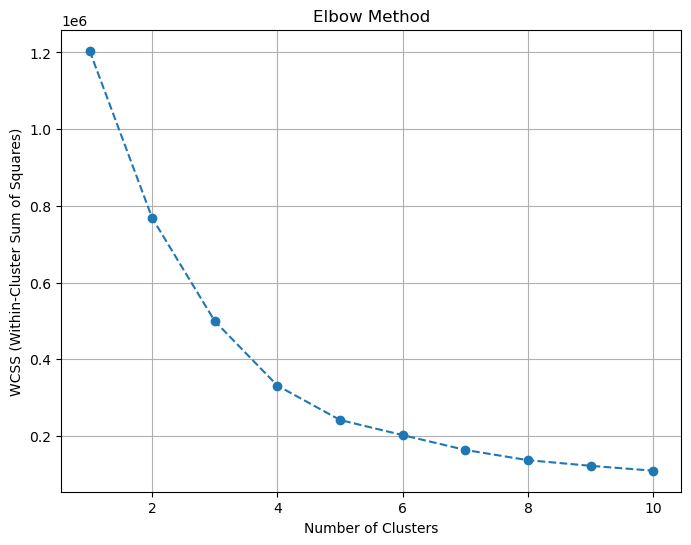

Cluster Centers:
    Quantity  UnitPrice  TotalRevenue
0  16.455300   1.214533     18.237927
1   2.802373   5.551926     14.614571
2  18.955862   4.278530     74.672818
3   3.343407   1.798647      5.899996


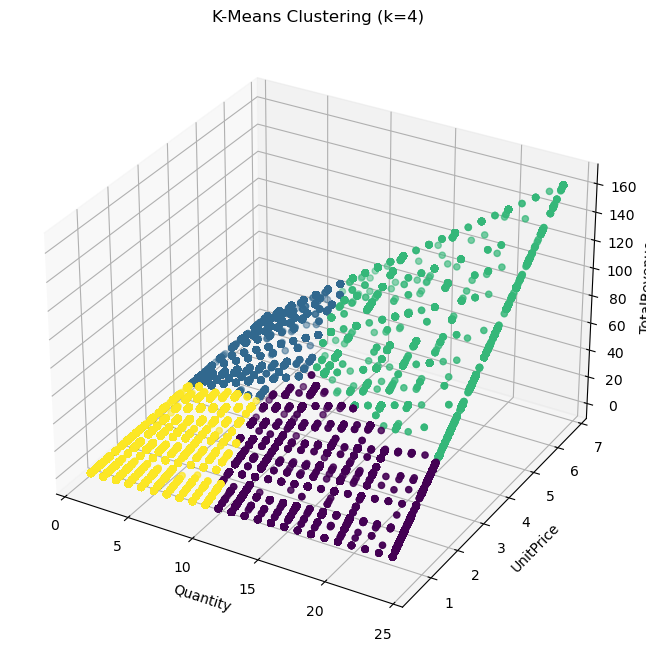

In [42]:
# Select relevant columns for clustering
X = data[['Quantity', 'UnitPrice', 'TotalRevenue']]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

# Based on the Elbow method, let's choose the number of clusters (k)
k = 4

# Apply K-Means clustering with the chosen k
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Explore the characteristics of each cluster
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
print("Cluster Centers:")
print(cluster_centers)

# Visualize the clusters in 3D (you can modify this based on your preferences)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Quantity'], X['UnitPrice'], X['TotalRevenue'], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
ax.set_zlabel('TotalRevenue')
ax.set_title('K-Means Clustering (k=4)')
plt.show()

Cluster 0 - Moderate Quantity, Low UnitPrice, and Low TotalRevenue
Quantity: The average quantity of products purchased by customers in this cluster 
UnitPrice: Customers in this cluster tend to buy products with a lower unit price
TotalRevenue: The total revenue generated by customers in this cluster is relatively low


Cluster 1 - Low Quantity, High UnitPrice, and Moderate TotalRevenue
Quantity: Customers in this cluster have a low average quantity of products purchased
UnitPrice: They tend to buy products with a higher unit price
TotalRevenue: The total revenue generated by customers in this cluster is moderate



Cluster 2 - High Quantity, Moderate UnitPrice, and High TotalRevenue
Quantity: Customers in this cluster purchase products in larger quantities
UnitPrice: They tend to buy products with a moderate unit price
TotalRevenue: The total revenue generated by customers in this cluster is high


Cluster 3 - Low Quantity, Low UnitPrice, and Very Low TotalRevenue
Quantity: Customers in this cluster have a low average quantity of products purchased
UnitPrice: They tend to buy products with a low unit price
TotalRevenue: The total revenue generated by customers in this cluster is very low